15/09 - 30/09

In [2]:
from IPython.display import SVG
import numpy as np
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph, svg_bigraph
from sknetwork.data import from_edge_list, from_adjacency_list, block_model
import matplotlib.pyplot as plt
from scipy import sparse
import random
from collections import Counter
from scipy.stats import entropy
import seaborn as sns
from tqdm import tqdm
from scipy.sparse import csr_matrix


In [26]:
graph = block_model([127,1], p_in=[0.1,0.001], p_out=0.98, metadata=True)
adjacency = graph.adjacency
labels = graph.labels

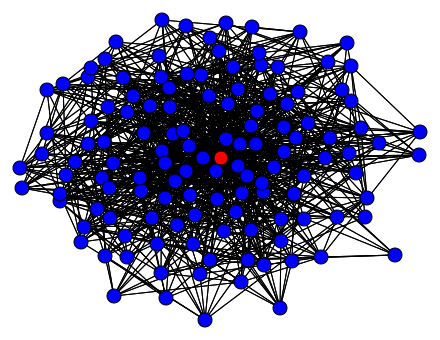

In [27]:
image = svg_graph(graph.adjacency, labels=graph.labels)
SVG(image)

Entropy:  4.763175423327086


Text(0, 0.5, 'Pagerank scores')

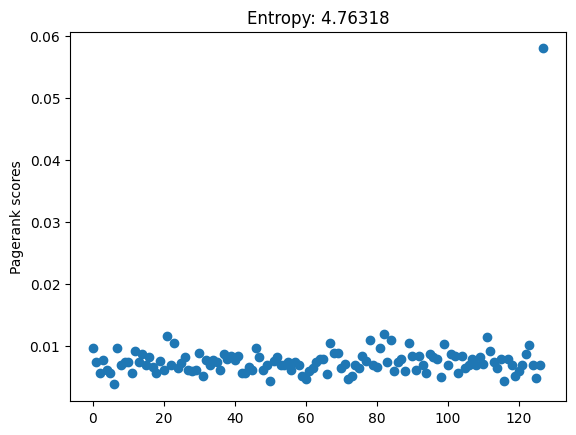

In [28]:
pagerank = PageRank()
scores = pagerank.fit_predict(graph.adjacency)
print("Entropy: ", entropy(scores))
entropy_value = entropy(scores)

plt.scatter(range(len(scores)),scores)
plt.title("Entropy: {:.5f}".format(entropy_value))  # Affichage de l'entropie dans le titre
plt.ylabel("Pagerank scores")

In [29]:
def proba_sample(sample):
    counts = Counter(sample)
    Count_Keys = list(counts.keys())
    Count_Keys.sort()
    sorted_counts = {i: counts[i] for i in Count_Keys}

    prob_vec = []
    for i in range(len(scores)):
        if i in list(sorted_counts.keys()):
            prob_vec.append(sorted_counts[i])
        else:
            prob_vec.append(0)

    prob_vec = np.array(prob_vec)/sum(prob_vec)
    return prob_vec

<BarContainer object of 128 artists>

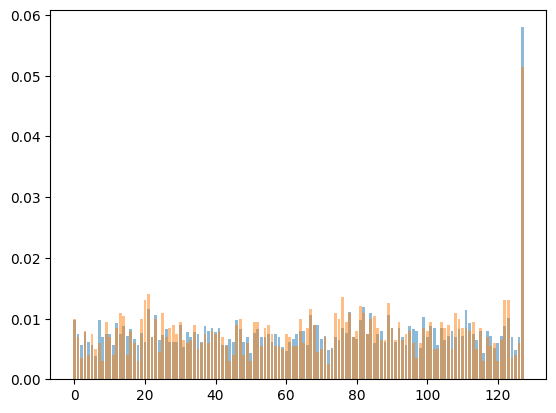

In [30]:
points = list(range(len(scores)))
nbr_of_sample = 2000
# scores_1 = [0]*len(scores)
# scores_1[0:2] = scores[0:2]
# print(scores)
# print(scores_1)
sample = random.choices(points, scores, k = nbr_of_sample)
plt.bar(range(len(scores)),scores, alpha = 0.5)
plt.bar(range(len(scores)),proba_sample(sample), alpha = 0.5)


1) Sample T points from D (domain of D is [n])
2) For each point sigma in T
    a) For each index j in [log(n)]
            sample K times from D_sigma<j

30/09 - 04/10

small test

In [31]:
points = list(range(16))
n = len(points)
nbr_K = 50
# print(points)


sigma = 5

sup = points[n-1]
inf = 0
middle = int(inf + (sup-inf+1)/2)

# print("inf: ",inf)
# print("sup: ", sup)
# print("middle: ", middle)
# print("----------------------")
while middle > inf:
    if sigma >= middle:
        inf = middle
    else: 
        sup = middle - 1 
    middle = int(inf + (sup-inf+1)/2)   

    # print("inf: ",inf)
    # print("sup: ", sup)
    # print("middle: ", middle)
    # print("----------------------")

    # scores_1 = [0]*n
    # scores_1[inf, sup] = scores[inf, sup]
    # K.append(random.choices(points, scores_1, k = nbr_K))
    print("sample ", nbr_K, "numbers between ",inf, " and ", sup)


sample  50 numbers between  0  and  7
sample  50 numbers between  4  and  7
sample  50 numbers between  4  and  5
sample  50 numbers between  5  and  5


draw "dichotomique" samples and estimate the probability

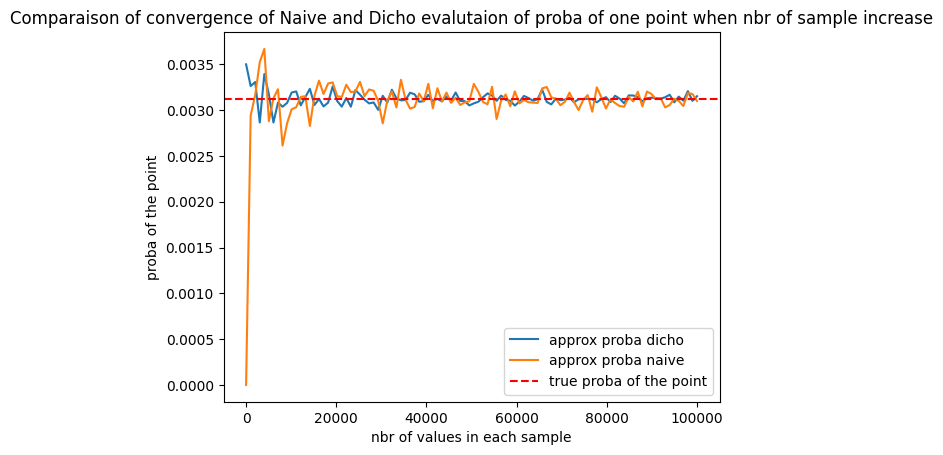

C:\Users\legof\AppData\Local\Temp\ipykernel_12400\1340028610.py:90: RuntimeWarning: divide by zero encountered in log
  ratio_P_naive = [np.log(value/scores[sigma]) for value in P_naive]


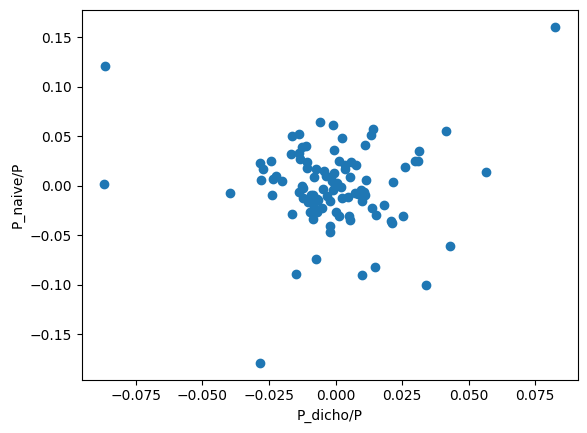

In [36]:
def samples_and_bounds(sigma, nbr_K):
    # print("point sigma: ", sigma)
    n = len(scores)
    K = []
    bounds = []
    sup = points[n-1]
    inf = 0
    middle = int(inf + (sup-inf+1)/2)
    while middle > inf: 
        scores_1 = [0]*n
        scores_1[inf: sup+1] = scores[inf: sup+1]
        scores_1 = [value / sum(scores_1) for value in scores_1]
        K.append(random.choices(points, scores_1, k = nbr_K))
        bounds.append((inf, sup))
        # print("draw numbers between ",inf, " and ", sup)
        # print(K[-1])
        if sigma >= middle:
            inf = middle
        else: 
            sup = middle - 1 
        middle = int(inf + (sup-inf+1)/2)  
    return(K, bounds)

# K, bounds = samples_and_bounds(T[0])
# print(K)
# print(bounds)


def proba_partial(inf, sup, L):
    count = 0
    for l in L:
        if inf <= l <= sup:
            count += 1
    return count / len(L)

def proba(sigma, nbr_K):
    K, bounds = samples_and_bounds(sigma, nbr_K)
    # print("nombre de sample: ", len(K))
    bounds.append((sigma, sigma))
    p = 1
    for i in range(len(K)):
        inf, sup = bounds[i+1]
        p_i = proba_partial(inf, sup, K[i])
        # print("inf: ", inf, "sup: ", sup, "sample: ", K[i])
        # print(p_i)
        p *= p_i
    return p



# Create a distribution
# scores = [0.01]*128
# scores[127] = 0.9
# scores = [value / sum(scores) for value in scores]
# plt.bar(range(len(scores)),scores, alpha = 0.5)
# plt.xlabel('point')
# plt.ylabel('proba of the point')
# plt.title('Distribution')
# plt.show()

points = list(range(len(scores))) # The domain D
# nbr_K = 1000 #nbr of value in each sample

T = [25]  #random.choices(points, scores, k = nbr_T)
sigma = T[0]

P_dicho = []
P_naive = []
values_nbr_K = np.linspace(10,100000, 100)
for nbr_K in values_nbr_K:
    nbr_K = int(nbr_K)
    proba_k = proba(sigma, nbr_K)
    # print("approx proba of ",sigma, ": ",proba_k)
    P_dicho.append(proba_k)

    total_sampling = 7*nbr_K # WARNING 7 = nbr of samples 
    P_naive.append(proba_partial(sigma, sigma,random.choices(points, scores, k = total_sampling)))


plt.plot(values_nbr_K, P_dicho, label='approx proba dicho')
plt.plot(values_nbr_K, P_naive, label='approx proba naive')
plt.axhline(y=scores[sigma], color='r', linestyle='--', label='true proba of the point')
plt.xlabel('nbr of values in each sample')
plt.ylabel('proba of the point')
plt.title('Comparaison of convergence of Naive and Dicho evalutaion of proba of one point when nbr of sample increase')
plt.legend()
plt.show()

ratio_P_dicho = [np.log(value/scores[sigma]) for value in P_dicho]
ratio_P_naive = [np.log(value/scores[sigma]) for value in P_naive]

plt.plot(ratio_P_dicho[1:], ratio_P_naive[1:], "o")
plt.xlabel('P_dicho/P')
plt.ylabel('P_naive/P')
plt.show()



|log(p_approcx/P)| ....better visualization 

04/09 - .....

Q0: Create more interesting distributions

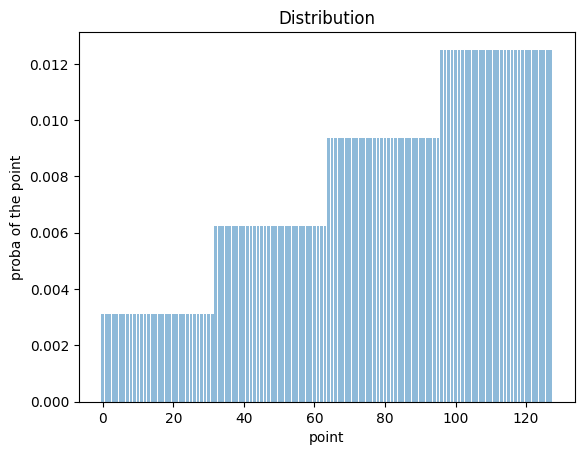

In [35]:
# Create a distribution
n = 5

scores = [0.01]*int(2**n)
scores += [0.02]*int(2**n)
scores += [0.03]*int(2**n)
scores += [0.04]*int(2**n)

scores = [value / sum(scores) for value in scores]
plt.bar(range(len(scores)),scores, alpha = 0.5)
plt.xlabel('point')
plt.ylabel('proba of the point')
plt.title('Distribution')
plt.show()

Q1:

a: for a given coin with p prof of heads, how many samples do I need to find out (1-epsilon)<=^p/p<=(1+epsilon)
where ^p is a estimate of p

b: same as above but you don't have p, find the algo. 
(cf: https://epubs.siam.org/doi/pdf/10.1137/S0097539797315306 page 3)
![Alt text](image.png)

c: use algoin Q2 with the dichotomic estimator

In [ ]:
import random

p = 0.2
distribution = [p, 1 - p]
values = [1, 0]
epsilon = 1e-2

def proba_approx(sample):
    return sum(sample) / len(sample)

sample = random.choices(values, distribution, k=1)  
p_approx = [proba_approx(sample)]

while True:
    sample += random.choices(values, distribution, k=20000)
    p_approx.append(proba_approx(sample))

    # Check for convergence within the range
    if (1 - epsilon) <= (p_approx[-1] / p) <= (1 + epsilon) and (1 - epsilon) <= (p_approx[-2] / p) <= (1 + epsilon):
        print(f"Convergence found at iteration.")
        break


print("Length of the sample:", len(sample))


Convergence found at iteration.
Length of the sample: 40001


0.00998990010099899


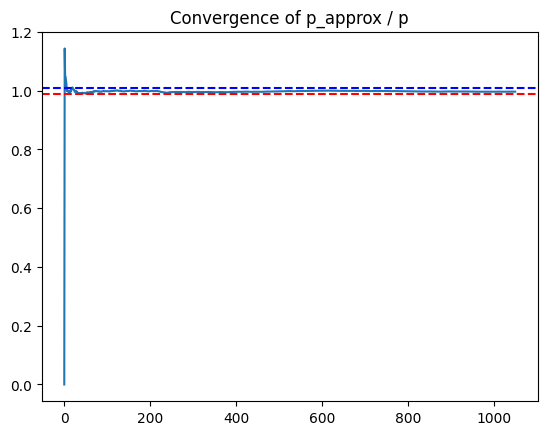

Length of the sample: 1049001
Convergence found at iteration 1049.


In [37]:
import random
import matplotlib.pyplot as plt

p = 0.2
distribution = [p, 1 - p]
values = [1, 0]
epsilon = 1e-2
nbr_points_converge = 1000

def proba_approx(sample):
    return sum(sample) / len(sample)

sample = random.choices(values, distribution, k=1)
p_approx = [proba_approx(sample)]

convergence_found = False
convergence_i = None

i_max = 100001

for i in range(1,i_max ):
    sample += random.choices(values, distribution, k=1000)
    p_approx.append(proba_approx(sample))


    if len(p_approx) >= nbr_points_converge:
        convergence_found = True
        for j in range(1, nbr_points_converge):
            if not ((1 - epsilon) <= (p_approx[-j] / p) <= (1 + epsilon)):
                convergence_found *= False
                break
        if convergence_found:
            convergence_i = i
            break
    if i%1000 == 999:
        print(i/i_max)

L = [p_approx_i / p for p_approx_i in p_approx]
plt.plot(L)
plt.axhline(y=1 - epsilon, color='r', linestyle='--', label='1 - epsilon')
plt.axhline(y=1 + epsilon, color='b', linestyle='--', label='1 + epsilon')
plt.title('Convergence of p_approx / p')
plt.show()


    # # Check for convergence within the range
    # if (1 - epsilon) <= (p_approx[-1] / p) <= (1 + epsilon) and (1 - epsilon) <= (p_approx[-2] / p) <= (1 + epsilon):
    #     convergence_found = True
    #     convergence_i = i
    #     break

print("Length of the sample:", len(sample))

if convergence_found:
    print(f"Convergence found at iteration {convergence_i}.")
else:
    print("Convergence not found within 100,000 iterations.")


In [44]:
eps = 0.01   # 0 < eps < 1
delta = 0.1   # 0 < delta 

# sampling Z
p = 0.01
distribution = [p, 1 - p]
values = [1, 0]
# z = random.choices(values, distribution, k=1)


l  = (np.exp(1)-2)
Y = 4*l*np.log(2/delta)/eps**2
Y_1 = 1+(1+eps)*Y
N=0
S=0
while S<Y_1:
    N+=1
    S+= random.choices(values, distribution, k=1)[0]
    if N%100 ==0:
        print(N)
mu_z = Y_1/N
print(mu_z)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
1850

Q2: 

draw s1, ....., sm in D
for i in [1,n]
    Xi = log(1/^p(si) * 1_{^p(si)>=tho})
delta = 2

(cf: https://arxiv.org/pdf/1402.3835.pdf page 13 )

![Alt text](image-1.png)

error: 0<=delta <= log(n)

In [4]:
# functions to estimate the probabilites
def samples_and_bounds(sigma, nbr_K):
    K = []
    bounds = []
    sup = points[n-1]
    inf = 0
    middle = int(inf + (sup-inf+1)/2)
    while middle > inf: 
        scores_1 = [0]*n
        scores_1[inf: sup+1] = scores[inf: sup+1]
        scores_1 = [value / sum(scores_1) for value in scores_1]
        K.append(random.choices(points, scores_1, k = nbr_K))
        bounds.append((inf, sup))
        if sigma >= middle:
            inf = middle
        else: 
            sup = middle - 1 
        middle = int(inf + (sup-inf+1)/2)  
    return(K, bounds)

def proba_partial(inf, sup, L):
    count = 0
    for l in L:
        if inf <= l <= sup:
            count += 1
    return count / len(L)

# sampling inside a while loop, stoping rule inside proba partial 

def proba_dicho(sigma, nbr_K):
    K, bounds = samples_and_bounds(sigma, nbr_K)
    bounds.append((sigma, sigma))
    p = 1
    for i in range(len(K)):
        inf, sup = bounds[i+1]
        p_i = proba_partial(inf, sup, K[i])
        p *= p_i
    return p

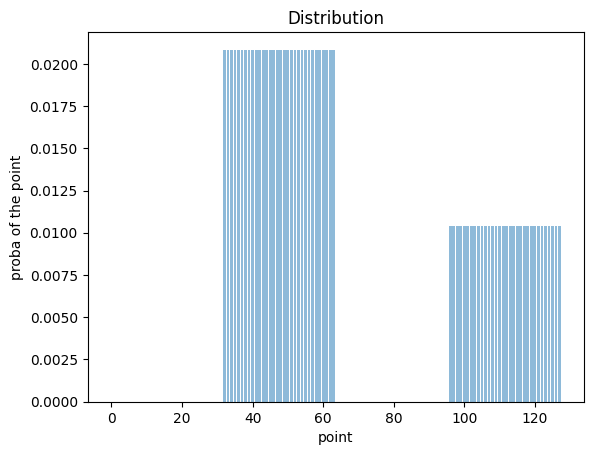

In [47]:
# Create a distribution
n = 5

scores = [0.000001]*int(2**n)
scores += [0.02]*int(2**n)
scores += [0.0000001]*int(2**n)
scores += [0.01]*int(2**n)

scores = [value / sum(scores) for value in scores]
plt.bar(range(len(scores)),scores, alpha = 0.5)
plt.xlabel('point')
plt.ylabel('proba of the point')
plt.title('Distribution')
plt.show()

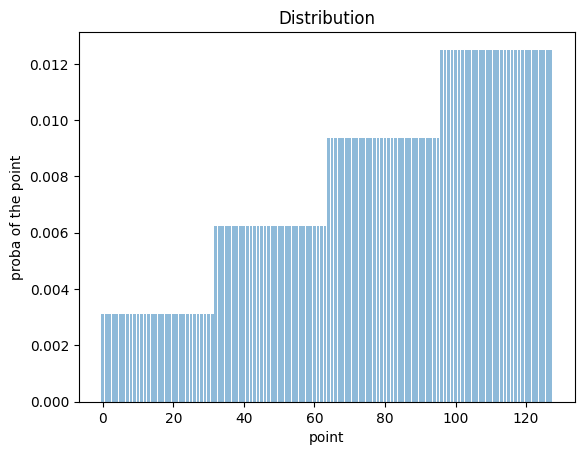

In [140]:
# Create a distribution
n = 5 #25 

scores = [0.01]*int(2**n)
scores += [0.02]*int(2**n)
scores += [0.03]*int(2**n)
scores += [0.04]*int(2**n)

scores = [value / sum(scores) for value in scores]
plt.bar(range(len(scores)),scores, alpha = 0.5)
plt.xlabel('point')
plt.ylabel('proba of the point')
plt.title('Distribution')
plt.show()

7.0

In [51]:
import math
nbr_K = 100 # nbr of samples in each dicho step
points = list(range(len(scores)))

# Choose delta in [0, log(n)] where n is the size of the distribution
n = len(points) # size of the distribution
delta = 1
teta = (delta/n)/(10*np.log(n/delta))
m = int(np.log(6)/(delta**2)  *  (np.log(1/teta))**2 )+1

print("Value of teta: ",teta,"\n")
samples = random.choices(points, scores, k=m)

probas = []
X = []
for sample in samples:
    p_i = proba_dicho(sample, nbr_K) # We use proba_dicho that we have built before 
    probas.append(p_i)
    if p_i >= teta:
        X.append(-math.log(p_i))
    else: 
        X.append(0)
H_hat = sum(X)/len(X)
    
print("Sample drawn: ", samples)
print("Proba of the samples estimates with dicho", probas)
print("Value of H_hat with estimates with dicho: ", H_hat, "\n")


probas = []
X = []
for sample in samples:
    p_i = proba_partial(sample,sample,random.choices(points, scores, k=int(nbr_K*(math.log(n)+2))))
    probas.append(p_i)
    if p_i >= teta:
        X.append(-math.log(p_i))
    else: 
        X.append(0)
H_hat = sum(X)/len(X)
    
print("Sample drawn: ", samples)
print("Proba of the samples estimates with naive", probas)
print("Value of H_hat with estimates with naive: ", H_hat, "\n")

print("Theorical value of entropy: ", entropy(scores))


Value of teta:  0.0001610150715277861 

Sample drawn:  [114, 59, 114, 35, 38, 53, 59, 53, 44, 41, 60, 63, 58, 38, 57, 51, 107, 62, 34, 33, 109, 56, 38, 38, 105, 52, 33, 63, 58, 42, 110, 60, 59, 41, 118, 96, 38, 34, 52, 63, 51, 113, 34, 40, 61, 104, 110, 54, 113, 45, 111, 44, 32, 44, 49, 50, 110, 119, 47, 46, 104, 63, 127, 118, 46, 58, 109, 62, 112, 116, 56, 127, 53, 62, 36, 62, 58, 32, 59, 46, 123, 46, 96, 117, 57, 120, 62, 45, 118, 47, 32, 42, 126, 56, 103, 51, 54, 48, 57, 62, 41, 52, 112, 101, 46, 45, 108, 49, 112, 45, 63, 45, 51, 114, 49, 36, 101, 35, 47, 112, 99, 103, 55, 37, 56, 32, 60, 41, 102, 57, 101, 62, 52, 119, 57, 35, 116]
Proba of the samples estimates with dicho [0.009838673935999999, 0.015191293000000003, 0.007801812, 0.027626445000000003, 0.020970700800000006, 0.02874027520000001, 0.04004636328, 0.03632060390400001, 0.018321811200000006, 0.0160178256, 0.013903853580000004, 0.03324194874, 0.02187609606, 0.024987549600000002, 0.022754414592, 0.019432479000000003, 0.016251

In [49]:
m

6

In [52]:
H_hat_dicho = []
H_hat_naive = []
H_hat_dicho_all = []

for i in range(10): 
    samples = random.choices(points, scores, k=m)

    # Dicho
    X = []
    for sample in samples:
        p_i = proba_dicho(sample, nbr_K) # We use proba_dicho that we have built before 
        if p_i >= teta:
            X.append(-math.log(p_i))
        else: 
            X.append(0)
    H_hat_dicho.append(sum(X)/len(X))

    # Dicho
    X = []
    for sample in samples:
        p_i = proba_dicho(sample, nbr_K) # We use proba_dicho that we have built before 
        X.append(-math.log(p_i))
    H_hat_dicho_all.append(sum(X)/len(X))

    # Naive  
    X = []
    for sample in samples:
        p_i = proba_partial(sample,sample,random.choices(points, scores, k=int(nbr_K*(math.log(n)+2))))
        if p_i >= teta:
            X.append(-math.log(p_i))
        else: 
            X.append(0)
    H_hat_naive.append(sum(X)/len(X))


H_theorical = entropy(scores)
plt.plot(H_hat_dicho-H_theorical, H_hat_dicho_all-H_theorical, "o")
plt.xlabel("H_hat_dicho/H_theorical")
plt.ylabel("H_hat_dicho_all/H_theorical")
plt.show()

plt.plot(H_hat_dicho-H_theorical, H_hat_naive-H_theorical, "o")
plt.xlabel("H_hat_dicho/H_theorical")
plt.ylabel("H_hat_naive/H_theorical")
plt.show()


ValueError: math domain error

size 2**25
no hard codinf for nbr_K suse stopping rule

more types of disyributions
externalize asmpling and conditional sampling (with bounds)



variance reduction